# Covariance estimation

Covariance estimation refers to the process of determining the relationships between multiple variables in a dataset by estimating the covariance matrix. This matrix provides valuable insights into how changes in one variable relate to changes in others, indicating whether they tend to move in the same or opposite directions. 

### Methods for Covariance Estimation:
- Sample Covariance Matrix:  
    The most common method, particularly for smaller datasets, involves calculating the covariance between each pair of variables based on the available data. However, this method can be unreliable when the number of variables is large compared to the number of samples. 
- Shrinkage Estimators:  
    These estimators address the limitations of the sample covariance matrix, especially in high-dimensional settings (many variables, few samples). They work by shrinking the sample covariance matrix towards a simpler structure (e.g., a scaled identity matrix) to improve stability and accuracy. Popular shrinkage estimators include: 
    - Ledoit-Wolf Estimator:  
        Shrinks the sample covariance matrix towards a scaled identity matrix. 
    - L1-Penalized Estimator:  
        Encourages sparsity in the precision matrix (inverse of the covariance matrix), which can be useful for high-dimensional data. 
- Robust Covariance Estimation:  
    Methods designed to handle outliers or missing data, which can significantly affect the accuracy of covariance estimation. 
- Online Covariance Estimation:  
    Algorithms that can estimate the covariance matrix incrementally as new data arrives, suitable for situations where data is continuously being generated. 

### Table of Contents
1. [Ledoit-Wolf vs OAS estimation](#Ledoit-Wolf-vs-OAS-estimation)

## Ledoit-Wolf vs OAS estimation

The usual covariance maximum likelihood estimate can be regularized using shrinkage. Ledoit and Wolf proposed a close formula to compute the asymptotically optimal shrinkage parameter (minimizing a MSE criterion), yielding the Ledoit-Wolf covariance estimate.

Chen et al. proposed an improvement of the Ledoit-Wolf shrinkage parameter, the OAS coefficient, whose convergence is significantly better under the assumption that the data are Gaussian.

This example, inspired from Chen’s publication [1], shows a comparison of the estimated MSE of the LW and OAS methods, using Gaussian distributed data.

[1] “Shrinkage Algorithms for MMSE Covariance Estimation” Chen et al., IEEE Trans. on Sign. Proc., Volume 58, Issue 10, October 2010.

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import cholesky, toeplitz

from sklearn.covariance import OAS, LedoitWolf

np.random.seed(0)

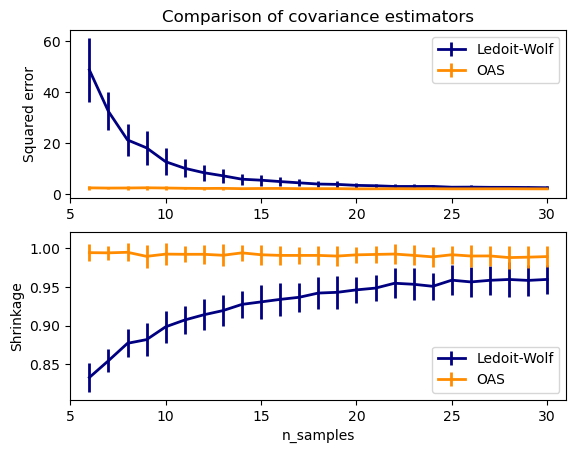

In [2]:
n_features = 100
# simulation covariance matrix (AR(1) process)
r = 0.1
real_cov = toeplitz(r ** np.arange(n_features))
coloring_matrix = cholesky(real_cov)

n_samples_range = np.arange(6, 31, 1)
repeat = 100
lw_mse = np.zeros((n_samples_range.size, repeat))
oa_mse = np.zeros((n_samples_range.size, repeat))
lw_shrinkage = np.zeros((n_samples_range.size, repeat))
oa_shrinkage = np.zeros((n_samples_range.size, repeat))
for i, n_samples in enumerate(n_samples_range):
    for j in range(repeat):
        X = np.dot(np.random.normal(size=(n_samples, n_features)), coloring_matrix.T)

        lw = LedoitWolf(store_precision=False, assume_centered=True)
        lw.fit(X)
        lw_mse[i, j] = lw.error_norm(real_cov, scaling=False)
        lw_shrinkage[i, j] = lw.shrinkage_

        oa = OAS(store_precision=False, assume_centered=True)
        oa.fit(X)
        oa_mse[i, j] = oa.error_norm(real_cov, scaling=False)
        oa_shrinkage[i, j] = oa.shrinkage_

# plot MSE
plt.subplot(2, 1, 1)
plt.errorbar(
    n_samples_range,
    lw_mse.mean(1),
    yerr=lw_mse.std(1),
    label="Ledoit-Wolf",
    color="navy",
    lw=2,
)
plt.errorbar(
    n_samples_range,
    oa_mse.mean(1),
    yerr=oa_mse.std(1),
    label="OAS",
    color="darkorange",
    lw=2,
)
plt.ylabel("Squared error")
plt.legend(loc="upper right")
plt.title("Comparison of covariance estimators")
plt.xlim(5, 31)

# plot shrinkage coefficient
plt.subplot(2, 1, 2)
plt.errorbar(
    n_samples_range,
    lw_shrinkage.mean(1),
    yerr=lw_shrinkage.std(1),
    label="Ledoit-Wolf",
    color="navy",
    lw=2,
)
plt.errorbar(
    n_samples_range,
    oa_shrinkage.mean(1),
    yerr=oa_shrinkage.std(1),
    label="OAS",
    color="darkorange",
    lw=2,
)
plt.xlabel("n_samples")
plt.ylabel("Shrinkage")
plt.legend(loc="lower right")
plt.ylim(plt.ylim()[0], 1.0 + (plt.ylim()[1] - plt.ylim()[0]) / 10.0)
plt.xlim(5, 31)

plt.show()